# Democrats Vs Republicans 
# Using NLP

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

import re
from nltk.stem import PorterStemmer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud,STOPWORDS
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('tweet.csv')
data

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear..."
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...


In [9]:
data.rename(columns={"Handle": "Politician"}, inplace=True)

In [10]:
#number of each party tweets:
data['Party'].value_counts()

Republican    44392
Democrat      42068
Name: Party, dtype: int64

In [11]:
#number of politicians in the dataset:
data['Politician'].value_counts()

RepDarrenSoto     200
RepMarkMeadows    200
RepDaveJoyce      200
RodneyDavis       200
RepLukeMesser     200
                 ... 
HouseAdmnGOP      199
RepEliotEngel     199
Jim_Jordan        197
RepVisclosky      197
collinpeterson     80
Name: Politician, Length: 433, dtype: int64

# NLP
# Sentiment Analysis

## Preprocessing

In [12]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = re.sub(r"\d+", "", tweet)
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    # Tokenization
    tokens = word_tokenize(tweet)
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into a single string
    processed_tweet = " ".join(tokens)
    
    return processed_tweet

# Preprocess the 'Tweet' column
data['ProcessedTweet'] = data['Tweet'].apply(preprocess_tweet)

data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shaya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Party,Politician,Tweet,ProcessedTweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote savetheinternet proud s...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resident alta vista t...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted hurricane mar...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting repdarrensoto thanks t...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season start june st pu...
...,...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...,check oped need end executive overreach act wh...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear...",yesterday betty amp great time learning forest...
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...,forever grateful service sacrifice major barney
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...,happy first day school cobbschools cobbbacktos...


## Using SentimentIntensityAnalyzer

In [13]:
sia = SentimentIntensityAnalyzer()
res = {}
for i in range(len(data)):
    tweet = data['ProcessedTweet'][i]
    politician = data['Politician'][i]
    res[politician] = sia.polarity_scores(tweet)

df = pd.DataFrame(res).T
df

,neg,neu,pos,compound
RepDarrenSoto,0.000,0.613,0.387,0.7430
RepJackyRosen,0.000,0.800,0.200,0.4588
RepAlLawsonJr,0.000,1.000,0.000,0.0000
RepEspaillat,0.000,1.000,0.000,0.0000
RepBRochester,0.000,0.633,0.367,0.4404
...,...,...,...,...
RobWittman,0.000,0.803,0.197,0.4019
RosLehtinen,0.000,0.833,0.167,0.2023
WaysandMeansGOP,0.000,0.446,0.554,0.8271
GOPpolicy,0.466,0.534,0.000,-0.7269


In [14]:
df = df.reset_index().rename(columns={'index': 'Politician'})
data = data.merge(df, how='right')
data.drop(['neg', 'neu', 'pos'], axis=1, inplace=True)

In [15]:
data

,Party,Politician,Tweet,ProcessedTweet,compound
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote savetheinternet proud s...,0.7430
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resident alta vista t...,0.7430
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted hurricane mar...,0.7430
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting repdarrensoto thanks t...,0.7430
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season start june st pu...,0.7430
...,...,...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...,check oped need end executive overreach act wh...,-0.8481
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear...",yesterday betty amp great time learning forest...,-0.8481
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...,forever grateful service sacrifice major barney,-0.8481
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...,happy first day school cobbschools cobbbacktos...,-0.8481


##  Using textblob

In [16]:
from textblob import TextBlob

In [17]:
# Function to perform sentiment analysis using TextBlob
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return polarity, sentiment

# Apply sentiment analysis to the "ProcessedTweet" column and store results in new columns
data[['Compound_TextBlob', 'Sentiment_TextBlob']] = data['ProcessedTweet'].apply(get_sentiment).apply(pd.Series)

In [18]:
data

,Party,Politician,Tweet,ProcessedTweet,compound,Compound_TextBlob,Sentiment_TextBlob
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote savetheinternet proud s...,0.7430,0.4000,Positive
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resident alta vista t...,0.7430,0.0000,Neutral
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted hurricane mar...,0.7430,-0.2000,Negative
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting repdarrensoto thanks t...,0.7430,0.2000,Positive
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season start june st pu...,0.7430,0.0000,Neutral
...,...,...,...,...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...,check oped need end executive overreach act wh...,-0.8481,0.0000,Neutral
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear...",yesterday betty amp great time learning forest...,-0.8481,0.8000,Positive
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...,forever grateful service sacrifice major barney,-0.8481,0.0625,Positive
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...,happy first day school cobbschools cobbbacktos...,-0.8481,0.5250,Positive


In [19]:
data["ProcessedTweet"].loc[86458]

'happy first day school cobbschools cobbbacktoschool'

In [20]:
#it looks like textblob is doing a better job!

In [21]:
#Label Encoding in case of using classifiers

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the Predicted Sentiment
data['Encoded_txtblb'] = label_encoder.fit_transform(data['Sentiment_TextBlob'])

data

,Party,Politician,Tweet,ProcessedTweet,compound,Compound_TextBlob,Sentiment_TextBlob,Encoded_txtblb
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote savetheinternet proud s...,0.7430,0.4000,Positive,2
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resident alta vista t...,0.7430,0.0000,Neutral,1
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted hurricane mar...,0.7430,-0.2000,Negative,0
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting repdarrensoto thanks t...,0.7430,0.2000,Positive,2
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season start june st pu...,0.7430,0.0000,Neutral,1
...,...,...,...,...,...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...,check oped need end executive overreach act wh...,-0.8481,0.0000,Neutral,1
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear...",yesterday betty amp great time learning forest...,-0.8481,0.8000,Positive,2
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...,forever grateful service sacrifice major barney,-0.8481,0.0625,Positive,2
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...,happy first day school cobbschools cobbbacktos...,-0.8481,0.5250,Positive,2


In [23]:
data['Encoded_txtblb'].value_counts()

2    39399
1    35877
0    11184
Name: Encoded_txtblb, dtype: int64

## Positivity Average for each politician

In [26]:
df = data.groupby('Politician')['Compound_TextBlob'].mean().reset_index()
df

,Politician,Compound_TextBlob
0,AGBecerra,0.085071
1,AlanGrayson,0.135804
2,AnthonyBrownMD4,0.141775
3,AustinScottGA08,0.148196
4,BennieGThompson,0.073057
...,...,...
428,reppittenger,0.110754
429,repsandylevin,0.084252
430,rosadelauro,0.126782
431,sethmoulton,0.124512


## demonstrating politicians with most and least average

<IPython.core.display.Javascript object>


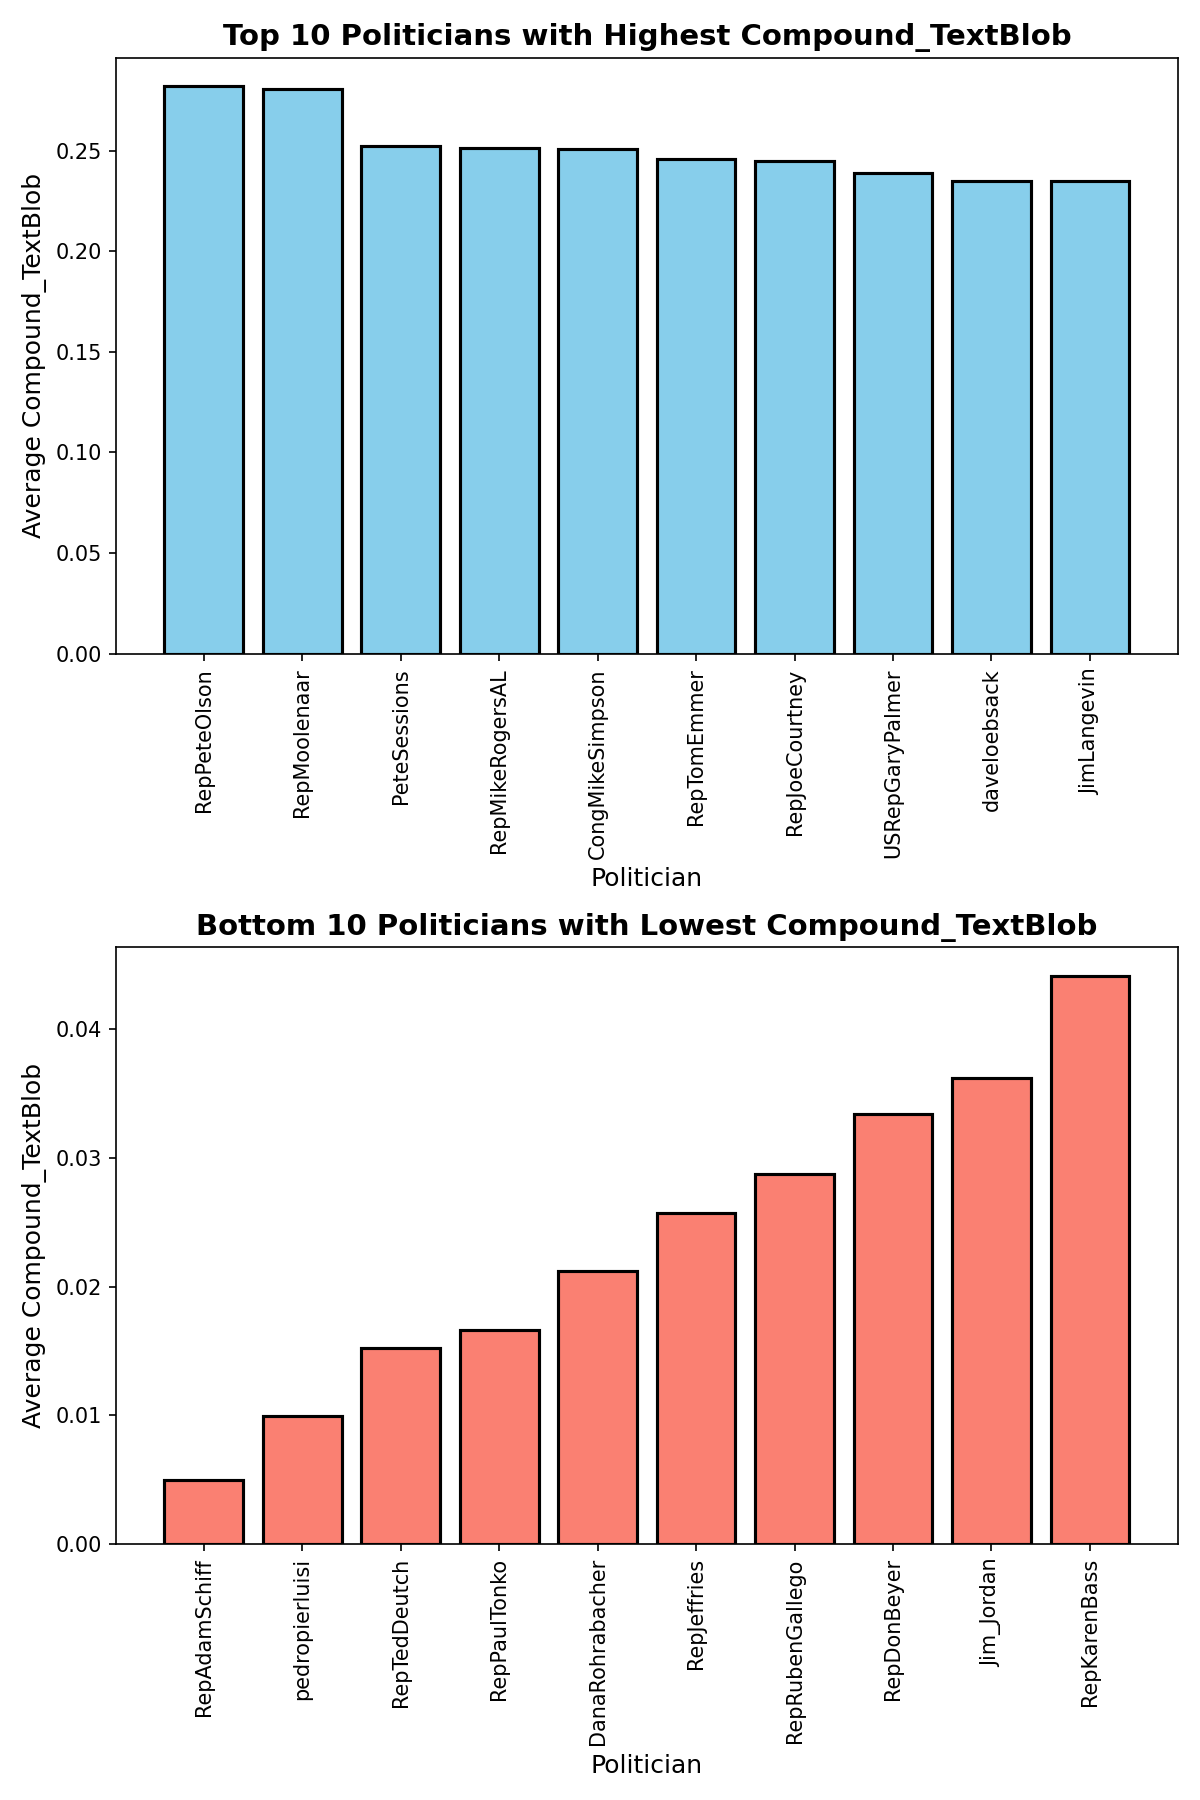

In [35]:
# Sort the dataframe by 'Average_Compound_TextBlob' in descending order for top politicians
top_10_politicians = df.nlargest(10, 'Compound_TextBlob')

# Sort the dataframe by 'Average_Compound_TextBlob' in ascending order for bottom politicians
bottom_10_politicians = df.nsmallest(10, 'Compound_TextBlob')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))

# Plot the top 10 politicians in the first subplot
ax1.bar(top_10_politicians['Politician'], top_10_politicians['Compound_TextBlob'], color='skyblue',
        edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Politician', fontsize=12)
ax1.set_ylabel('Average Compound_TextBlob', fontsize=12)
ax1.set_title('Top 10 Politicians with Highest Compound_TextBlob', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=90)

# Plot the bottom 10 politicians in the second subplot
ax2.bar(bottom_10_politicians['Politician'], bottom_10_politicians['Compound_TextBlob'], color='salmon',
        edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Politician', fontsize=12)
ax2.set_ylabel('Average Compound_TextBlob', fontsize=12)
ax2.set_title('Bottom 10 Politicians with Lowest Compound_TextBlob', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Positivity Average for each party

In [28]:
df1 = data.groupby('Party')['Compound_TextBlob'].mean().reset_index()
df1

,Party,Compound_TextBlob
0,Democrat,0.119206
1,Republican,0.146851


In [29]:
# Define the bar width
bar_width = 0.35

# Define the colors
colors = ['#779ECB', '#D98880']

# Create the bar plot
plt.bar(df1['Party'], df1['Compound_TextBlob'], width=bar_width, color=colors)
plt.xlabel('Party')
plt.ylabel('Compound_TextBlob')
plt.title('Compound_TextBlob by Party')

# Adjust the spacing between the bars
plt.subplots_adjust(wspace=0.1)

# Display the plot
plt.show()

## Frequency of Usage of Words by Parties

In [30]:
from nltk.probability import FreqDist
fdist_democrat = FreqDist(data[data["Party"] == "Republican"])
fdist_republican=FreqDist(data[data["Party"] == "Democrat"])

## Word Clouds

In [31]:
from PIL import Image

<IPython.core.display.Javascript object>


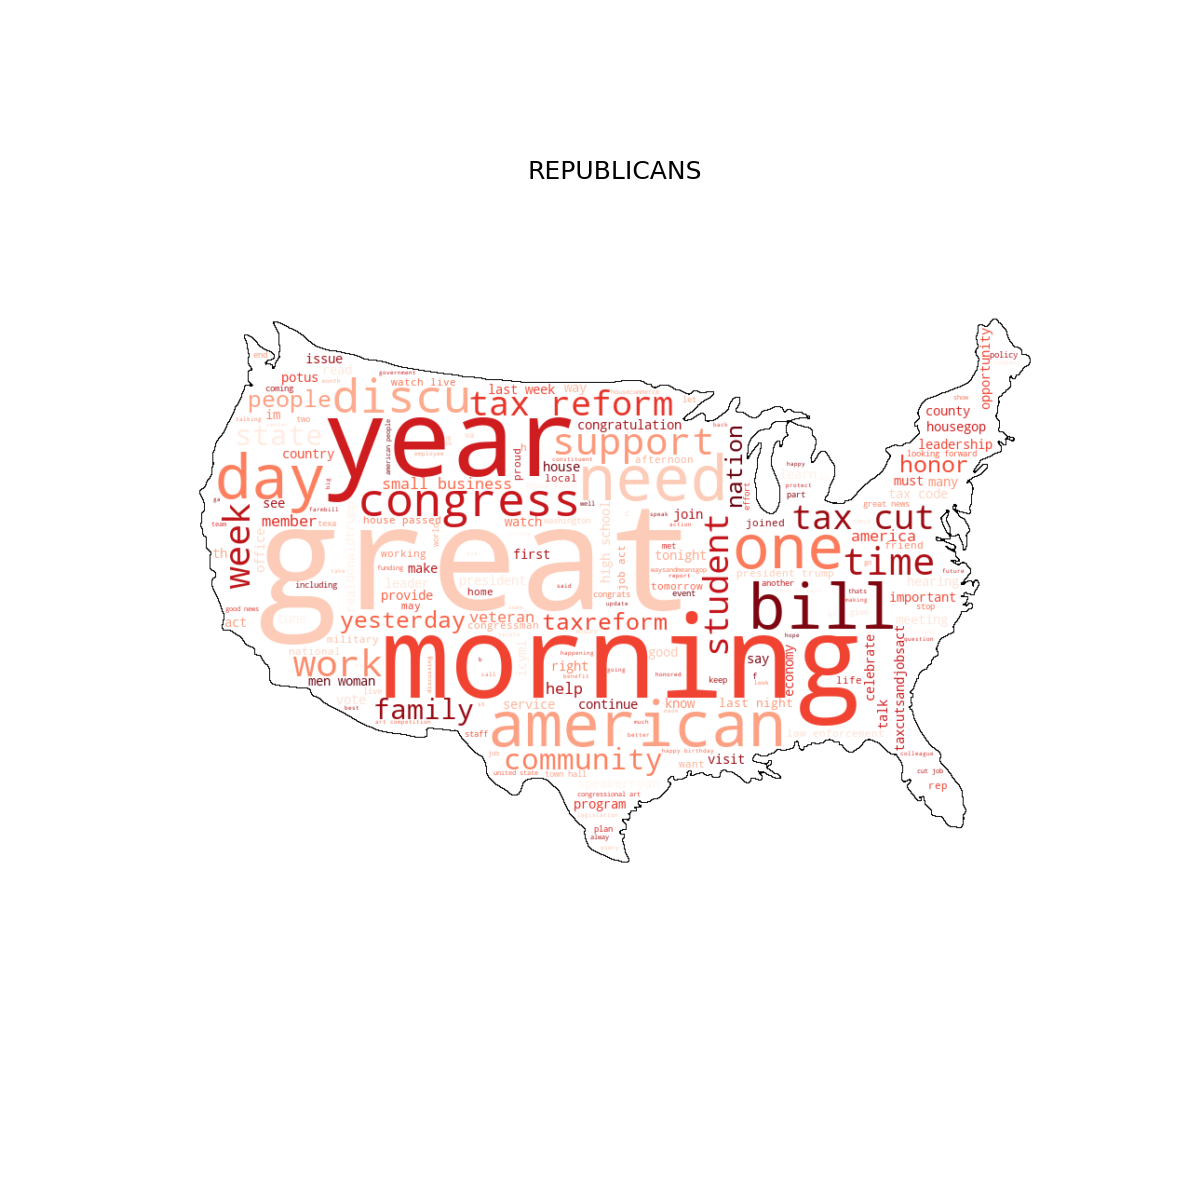

In [32]:
# Open the image file
image_path = "us.png"
image = Image.open(image_path)

# Convert the image to grayscale
image_gray = image.convert("L")

# Convert the image to an array of pixel values
image_array = np.array(image_gray)

# Threshold the image to create a mask
threshold = 150  # Adjust the threshold value as needed
mask = np.where(image_array > threshold, 255, 0).astype(np.uint8)

# Filter the data for Republican tweets
republican_tweets = data[data["Party"] == "Republican"]

# Get the text from the "ProcessedTweet" column for Republican tweets
text = " ".join(republican_tweets["ProcessedTweet"].values)

# Remove "rt" and "amp" from the word cloud
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["rt", "amp", "u", "thank", "today", "new", "thanks", "W"])

# Generate the word cloud with mask parameter and adjusted canvas size
wordcloud = WordCloud(
    background_color="white",
    mask=mask,
    contour_width=1,
    contour_color="black",
    width=1000,  # Increase the canvas width
    height=1000,  # Increase the canvas height
    stopwords=custom_stopwords,  # Use custom stopwords
    colormap="Reds"  # Set the colormap to Reds for red color style
).generate(text)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(wordcloud, interpolation="bilinear")
ax.set_axis_off()

# Display the image with the word cloud
plt.imshow(wordcloud, cmap=plt.cm.Reds, interpolation="bilinear")
plt.axis("off")
plt.title("REPUBLICANS")
plt.savefig("rep_wc.png")
plt.show()

<IPython.core.display.Javascript object>


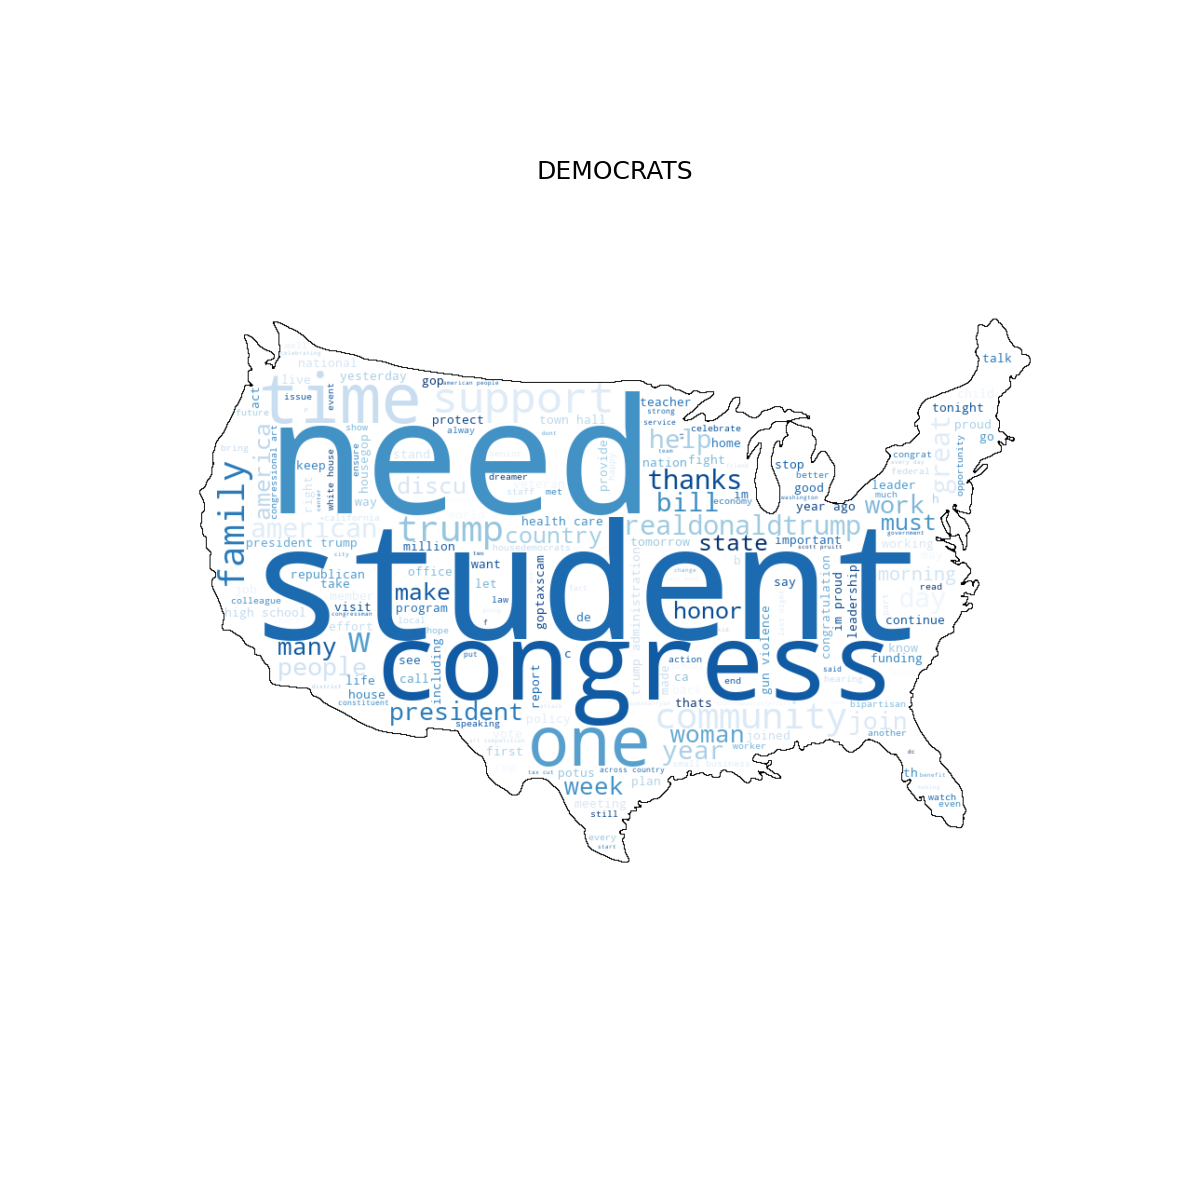

In [33]:
# Open the image file
image_path = "us.png"
image = Image.open(image_path)

# Convert the image to grayscale
image_gray = image.convert("L")

# Convert the image to an array of pixel values
image_array = np.array(image_gray)

# Threshold the image to create a mask
threshold = 150  # Adjust the threshold value as needed
mask = np.where(image_array > threshold, 255, 0).astype(np.uint8)

# Filter the data for Democrat tweets
democrat_tweets = data[data["Party"] == "Democrat"]

# Get the text from the "ProcessedTweet" column for Democrat tweets
text = " ".join(democrat_tweets["ProcessedTweet"].values)

# Remove "rt" and "amp" from the word cloud
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["rt", "amp", "u", "thank", "today", "new"])

# Generate the word cloud with mask parameter and adjusted canvas size
wordcloud = WordCloud(
    background_color="white",
    mask=mask,
    contour_width=1,
    contour_color="black",
    width=1000,  # Increase the canvas width
    height=1000,  # Increase the canvas height
    stopwords=custom_stopwords,  # Use custom stopwords
    colormap="Blues"  # Set the colormap to Blues for blue color style
).generate(text)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(wordcloud, interpolation="bilinear")
ax.set_axis_off()

# Display the image with the word cloud
plt.imshow(wordcloud, cmap=plt.cm.Blues, interpolation="bilinear")
plt.axis("off")
plt.title("DEMOCRATS")
plt.savefig("Dem_wc.png")
plt.show()

# Looks Like Democrats care more about us (students)! JK I'm not taking any sides:D